In [1]:
import glob
import pandas as pd 
import xml.etree.ElementTree as ET
from datetime import datetime
import requests
import json # Used to load data into Json format
import io
import csv
from pprint import pprint # pretty-print 
import urllib

In [2]:
keys_file = open("api_keys.py") # file to store API key
lines = keys_file.readlines()
api_key = lines[0].rstrip()

def JasonData(startDate,endDate):
    base_url = "https://api.nasa.gov/neo/rest/v1/feed?start_date="+startDate+"&end_date="+endDate+"&api_key="+api_key
    req = requests.get(base_url) 

    return req.json()

In [4]:


def createDictionary(json_data):
    
#using for loops to go loop throuh the list and add to dictionary

    for i in json_data['near_earth_objects']:
        
        try:
            if i !=0:
                print('Found Asteroids in this Date: ',i)
            
            for j in json_data['near_earth_objects'][i]:
                asteroids_data['neo_reference_id'].append(j['neo_reference_id'])
                asteroids_data['asteroid_name'].append(j['name'])
                asteroids_data['nasa_url'].append(j['nasa_jpl_url'])
                asteroids_data['absolute_magnitude'].append(j['absolute_magnitude_h'])
                asteroids_data['estimated diameter_min_km'].append(j['estimated_diameter']['kilometers']['estimated_diameter_min'])
                asteroids_data['estimated diameter_max_km'].append(j['estimated_diameter']['kilometers']['estimated_diameter_max'])
                asteroids_data['hazardous asteroid'].append(j['is_potentially_hazardous_asteroid'])
            for k in json_data ['near_earth_objects'][i]:
                asteroids_data['close approach date'].append(k['close_approach_data'][0]['close_approach_date'])
                asteroids_data['close approach date time'].append(k['close_approach_data'][0]['close_approach_date_full'])
                asteroids_data['close approach: Earth miss distance'].append(k['close_approach_data'][0]['miss_distance']['kilometers'])
                asteroids_data['relative velocity_km_per_secon'].append(k['close_approach_data'][0]['relative_velocity']['kilometers_per_second'])
                asteroids_data['relative velocity_km_per_hour'].append(k['close_approach_data'][0]['relative_velocity']['kilometers_per_hour'])
                asteroids_data['orbiting body'].append(k['close_approach_data'][0]['orbiting_body'])                
        except:
            print('There is no asteriod this day')
        
        
asteroids_data = {'neo_reference_id':[],
                 'asteroid_name':[],
                 'nasa_url':[],
                 'absolute_magnitude':[],
                 'estimated diameter_min_km':[],
                 'estimated diameter_max_km':[],
                 'hazardous asteroid':[],
                 'close approach date':[],
                 'close approach date time':[],
                 'close approach: Earth miss distance':[],
                 'relative velocity_km_per_secon':[],
                 'relative velocity_km_per_hour':[],
                 'orbiting body': []}
               


createDictionary(JasonData("2021-06-01","2021-06-08"))
createDictionary(JasonData("2021-06-09","2021-06-16"))
createDictionary(JasonData("2021-06-17","2021-06-24"))
createDictionary(JasonData("2021-06-25","2021-06-30"))
createDictionary(JasonData("2021-07-01","2021-07-08"))
createDictionary(JasonData("2021-07-09","2021-07-16"))
createDictionary(JasonData("2021-07-17","2021-07-24"))
createDictionary(JasonData("2021-07-25","2021-07-31"))
createDictionary(JasonData("2021-08-01","2021-08-08"))
createDictionary(JasonData("2021-08-09","2021-08-16"))
createDictionary(JasonData("2021-08-17","2021-08-24"))
createDictionary(JasonData("2021-08-25","2021-08-31"))
createDictionary(JasonData("2021-09-01","2021-09-08"))
createDictionary(JasonData("2021-09-09","2021-09-16"))
createDictionary(JasonData("2021-09-17","2021-09-24"))
createDictionary(JasonData("2021-09-25","2021-09-30"))
createDictionary(JasonData("2021-10-01","2021-10-08"))
createDictionary(JasonData("2021-10-09","2021-10-16"))
createDictionary(JasonData("2021-10-17","2021-10-24"))
createDictionary(JasonData("2021-10-25","2021-10-31"))
createDictionary(JasonData("2021-11-01","2021-11-08"))
createDictionary(JasonData("2021-11-09","2021-11-16"))
createDictionary(JasonData("2021-11-17","2021-11-24"))
createDictionary(JasonData("2021-11-25","2021-11-30"))
createDictionary(JasonData("2021-12-01","2021-12-08"))
createDictionary(JasonData("2021-12-09","2021-12-16"))
createDictionary(JasonData("2021-12-17","2021-12-24"))
createDictionary(JasonData("2021-12-25","2021-12-31"))
asteroids_data

asteroids_df = pd.DataFrame.from_dict(asteroids_data)
asteroids_df['close approach: Earth miss distance'] = asteroids_df['close approach: Earth miss distance'].astype(float)
asteroids_df['close approach: Earth miss distance'] = asteroids_df['close approach: Earth miss distance']/1000000

Found Asteroids in this Date:  2021-06-01
Found Asteroids in this Date:  2021-06-02
Found Asteroids in this Date:  2021-06-03
Found Asteroids in this Date:  2021-06-04
Found Asteroids in this Date:  2021-06-05
Found Asteroids in this Date:  2021-06-06
Found Asteroids in this Date:  2021-06-07
Found Asteroids in this Date:  2021-06-08
Found Asteroids in this Date:  2021-06-09
Found Asteroids in this Date:  2021-06-10
Found Asteroids in this Date:  2021-06-11
Found Asteroids in this Date:  2021-06-12
Found Asteroids in this Date:  2021-06-13
Found Asteroids in this Date:  2021-06-14
Found Asteroids in this Date:  2021-06-15
Found Asteroids in this Date:  2021-06-16
Found Asteroids in this Date:  2021-06-20
Found Asteroids in this Date:  2021-06-21
Found Asteroids in this Date:  2021-06-22
Found Asteroids in this Date:  2021-06-23
Found Asteroids in this Date:  2021-06-24
Found Asteroids in this Date:  2021-06-17
Found Asteroids in this Date:  2021-06-18
Found Asteroids in this Date:  202

Found Asteroids in this Date:  2021-12-23
Found Asteroids in this Date:  2021-12-22
Found Asteroids in this Date:  2021-12-24
Found Asteroids in this Date:  2021-12-21
Found Asteroids in this Date:  2021-12-20
Found Asteroids in this Date:  2021-12-19
Found Asteroids in this Date:  2021-12-18
Found Asteroids in this Date:  2021-12-17
Found Asteroids in this Date:  2021-12-25
Found Asteroids in this Date:  2021-12-30
Found Asteroids in this Date:  2021-12-31
Found Asteroids in this Date:  2021-12-27
Found Asteroids in this Date:  2021-12-26
Found Asteroids in this Date:  2021-12-29
Found Asteroids in this Date:  2021-12-28


- WE would like to create tables from the dataset.

asteroid_datails

    - event_id
    - neo_reference_id
    - asteroid_name
    - nasa_url
    - close_approach_date
    
asteroid_size

    - neo_referance_id
    - estimated_diameter_max_km
    - estimated_diameter_min_km
    - absolute_magnitude
    - close_approach_date_time
    
    
asteroid_speed

    - neo_referance_id
    - relative_velocity_km_per_secon
    - relative_velocity_km_per_hour
    - miss_distance(AU)
    
    
Hazardous_asteroid

    - neo_referance_id
    - close_approach_date_time
    - hazardous_asteroid

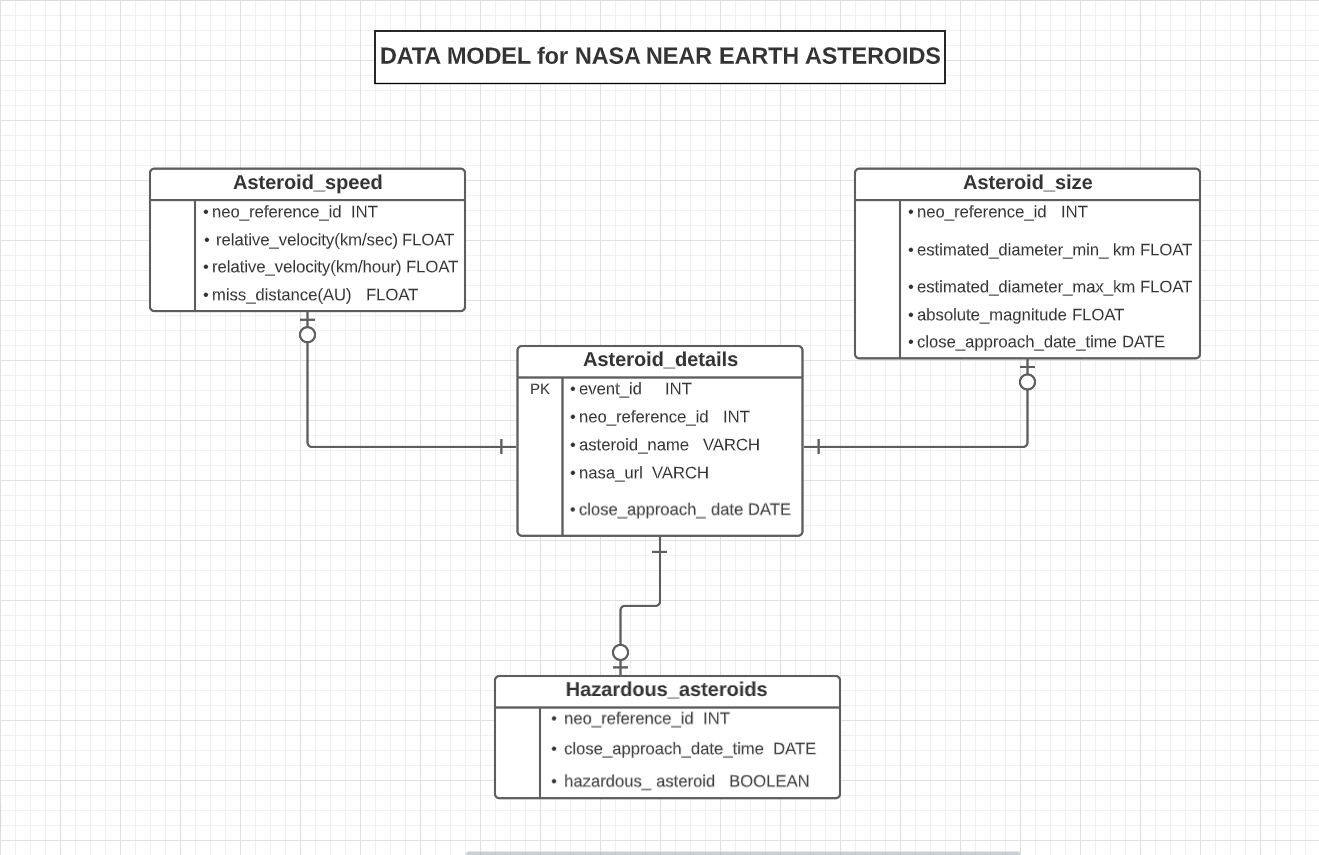

In [5]:
asteroids_details = asteroids_df[['neo_reference_id','asteroid_name','nasa_url','close approach date']].copy()
asteroids_details['event_ID'] = asteroids_details.index
col = asteroids_details.pop('event_ID')
asteroids_details.insert(0, 'event_ID', col)
asteroids_details.to_csv("asteroid_details.csv", index=False)


In [6]:
asteroids_speed_df = asteroids_df[['neo_reference_id','relative velocity_km_per_secon','relative velocity_km_per_hour','close approach: Earth miss distance']].copy()
asteroids_speed_df.to_csv("asteroid_speed.csv", index=False)


In [7]:
Hazardous_asteroids_df = asteroids_df[['neo_reference_id','close approach date time','hazardous asteroid']].copy()
Hazardous_asteroids_df.to_csv("asteroid_hazardous.csv", index=False)


In [8]:
asteroids_size_df = asteroids_df[['neo_reference_id','estimated diameter_min_km','estimated diameter_max_km','absolute_magnitude','close approach date time']].copy()
asteroids_size_df.to_csv("asteroid_size.csv", index=False)


In [2]:
import psycopg2
import keyring
password=keyring.get_password('test','user') # create password

# Creating tables 

In [11]:
import psycopg2 # import library

# all values inside connect() Postgress will know where you would like to connect.
con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

cur = con.cursor() # object we will be able to execute our commands
#execute method we will create tables.
cur.execute("""CREATE TABLE asteroid_details(event_id integer PRIMARY KEY, 
                    neo_reference_id integer,
                    asteroid_name varchar, nasa_url varchar,
                    close_approach_date DATE)""")
cur.execute("""CREATE TABLE hazardous_asteroid(neo_reference_id integer,
                    close_approach_date_time DATE,
                    hazardous_asteroid Boolean)""")
cur.execute("""CREATE TABLE asteroid_size(neo_reference_id integer ,
                    estimated_diameter_min_km float,
                    estimated_diameter_max_km float,
                    absolute_magnitude float, 
                    close_approach_date_time DATE)""")
cur.execute("""CREATE TABLE asteroid_speed(neo_reference_id integer ,
                    relative_velocity_km_per_secon float,
                    relative_velocity_km_per_hour float,
                    miss_distance_kilometer float)""")
con.commit() # when commit is called , the PostgressSQL engine will run all the queries at once
con.close()

# Inserting datas into tables

In [12]:
import psycopg2

con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
with open('asteroid_details.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'asteroid_details', sep=',') # load our file
    

con.commit()


In [13]:
# cursor
cur = con.cursor()
with open('asteroid_size.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'asteroid_size', sep=',')# load our file 

con.commit()

In [14]:
# cursor
cur = con.cursor()
with open('asteroid_speed.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'asteroid_speed', sep=',')# load our file

con.commit()

In [15]:
# cursor
cur = con.cursor()
with open('asteroid_hazardous.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'hazardous_asteroid', sep=',')# load our file

con.commit()
con.close()

# Queries:

 Question_1 : What are the identifers and sizes of asteroids that missed the Earth by distance within 7 -7.5 M km?

explaining the code: to get the answer to this question I need information from two tables asteroid_size and asteroid_speed. I join two tables using neo_reference_id column that is present in both tables.I add filter for miss distance column using where and between clause. then I used for loop to print each row from the SQL query result.

In [6]:
import psycopg2

con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
cur.execute('''SELECT asteroid_size.neo_reference_id,estimated_diameter_max_km,miss_distance_kilometer
FROM  asteroid_size
INNER JOIN asteroid_speed
ON asteroid_size.neo_reference_id = asteroid_speed.neo_reference_id
WHERE miss_distance_kilometer
BETWEEN 7 and 7.5''')

for row in cur:
    print("asteroid ID: " + str(row[0]) +", estimated diameter max (km): "+ str(row[1]) + ", Earth miss distance: " + str(row[2]))
cur.close()
con.close()

asteroid ID: 54147407, estimated diameter max (km): 0.3119176705, Earth miss distance: 7.250000170060461
asteroid ID: 54156749, estimated diameter max (km): 0.0359782453, Earth miss distance: 7.005075919333734
asteroid ID: 54158252, estimated diameter max (km): 0.0809170384, Earth miss distance: 7.336768296001076
asteroid ID: 54161861, estimated diameter max (km): 0.3236234466, Earth miss distance: 7.1418016705291585
asteroid ID: 54157821, estimated diameter max (km): 0.1374168468, Earth miss distance: 7.443573605528854
asteroid ID: 54167172, estimated diameter max (km): 0.050354696, Earth miss distance: 7.210075834589961
asteroid ID: 54178145, estimated diameter max (km): 0.0835679943, Earth miss distance: 7.158423415065924
asteroid ID: 54177984, estimated diameter max (km): 0.0385513844, Earth miss distance: 7.169178379934898
asteroid ID: 54172000, estimated diameter max (km): 0.2322950625, Earth miss distance: 7.440522736487649
asteroid ID: 54185142, estimated diameter max (km): 0.0

# plot for question 1

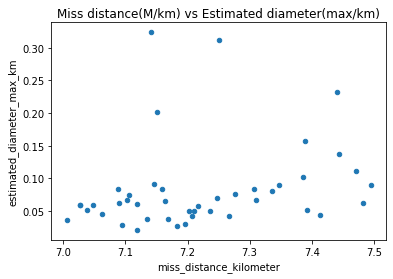

In [12]:
import psycopg2
import matplotlib.pyplot as plt
con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
# I converted my SQL queries to dataframe and then I made scatter plot
Missing_distance_sql_queries = pd.read_sql_query('''SELECT asteroid_size.neo_reference_id,estimated_diameter_max_km,miss_distance_kilometer
FROM  asteroid_size
INNER JOIN asteroid_speed
ON asteroid_size.neo_reference_id = asteroid_speed.neo_reference_id
WHERE miss_distance_kilometer
BETWEEN 7 and 7.5''', con)

Missing_distance_sql_queries.plot.scatter(x = 'miss_distance_kilometer',
                       y= 'estimated_diameter_max_km')
plt.title('Miss distance(M/km) vs Estimated diameter(max/km)')

plt.show()

cur.close()
con.close()

Expalining the Plot : As you can see on above scatter plot, majority of asteroids missing the Earth by 7-7.5 M km are less than 0.10 km in diameter.

Question_2 : What are the speeds, sizes, and hazardousness of top 50 fastest asteroids in the dataset?

explaining the code: to get the answer to this question I need information from all four tables. I used three INNER JOIN to connect the tables via neo_reference_id column. To get top 50 result I used ORDER BY DESC clause and limited the results to 50 rows. then I used for loop to print each row from the SQL query result.

In [13]:
import psycopg2

con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
cur.execute('''SELECT asteroid_name,relative_velocity_km_per_hour ,hazardous_asteroid,estimated_diameter_max_km
FROM asteroid_details
INNER JOIN asteroid_speed
ON asteroid_details.neo_reference_id = asteroid_speed.neo_reference_id
INNER JOIN asteroid_size as asize
ON  asteroid_speed.neo_reference_id = asize.neo_reference_id
INNER JOIN hazardous_asteroid
on asize.neo_reference_id = hazardous_asteroid.neo_reference_id
ORDER by relative_velocity_km_per_hour desc
LIMIT 50''')

for row in cur:
    print("asteroid name: " + str(row[0]) + ", relative velocity (km/per/hour): " + str(row[1]) + ", hazardous asteroid: " + str(row[2]) + ",estimated diameter (max/km): " + str(row[3]))
cur.close()
con.close()

asteroid name: (2017 UO), relative velocity (km/per/hour): 157742.4051444262, hazardous asteroid: False,estimated diameter (max/km): 0.5420507863
asteroid name: (2014 JW54), relative velocity (km/per/hour): 151102.4743999796, hazardous asteroid: False,estimated diameter (max/km): 1.1067256584
asteroid name: (2003 UC5), relative velocity (km/per/hour): 149843.7442418908, hazardous asteroid: False,estimated diameter (max/km): 0.5675968529
asteroid name: (2021 RW9), relative velocity (km/per/hour): 147117.3950382462, hazardous asteroid: True,estimated diameter (max/km): 0.3855138443
asteroid name: (2014 KP4), relative velocity (km/per/hour): 147052.5910521239, hazardous asteroid: True,estimated diameter (max/km): 0.8590926012
asteroid name: (2021 WY4), relative velocity (km/per/hour): 141452.9943771182, hazardous asteroid: False,estimated diameter (max/km): 0.4211530777
asteroid name: 516734 (2009 FG1), relative velocity (km/per/hour): 140347.3537503259, hazardous asteroid: False,estimate

# Plot for question 2

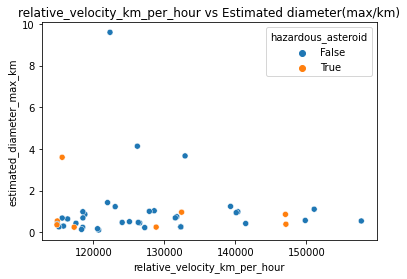

In [14]:
import psycopg2
import seaborn as sns
con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
# I converted my SQL queries to dataframe and then I made scatter plot
speed_size_hazardous_sql_queries = pd.read_sql_query('''SELECT asteroid_name,relative_velocity_km_per_hour ,hazardous_asteroid,estimated_diameter_max_km
FROM asteroid_details
INNER JOIN asteroid_speed
ON asteroid_details.neo_reference_id = asteroid_speed.neo_reference_id
INNER JOIN asteroid_size as asize
ON  asteroid_speed.neo_reference_id = asize.neo_reference_id
INNER JOIN hazardous_asteroid
on asize.neo_reference_id = hazardous_asteroid.neo_reference_id
ORDER by relative_velocity_km_per_hour desc
LIMIT 50''',con)
# scatter plot 
sns.scatterplot(x = 'relative_velocity_km_per_hour',
                y = 'estimated_diameter_max_km',
                data = speed_size_hazardous_sql_queries,
                hue = 'hazardous_asteroid')
plt.title('relative_velocity_km_per_hour vs Estimated diameter(max/km)')

plt.show()

con.close()

explaining the plot: here we are only looking at the top 50 fastest asteroids. Therefore, our observations may not apply to slower asteroids. in this population we see that majority of asteroids are less than 2 km in size. Our intuition may suggest that hazardous asteroids are typically larger - however, this plot shows that some smaller asteroids can still be hazardous and other features may need to be considered when building models to classify asteroids. 
 

Question_3 : What are the sizes, speeds, and hazardousness for 50 asteroids that came closest to Earth (shortest Earth miss distance M km)?

explaining the code: to get the answer to this question I need information from all four tables. I used three INNER JOIN to connect the tables via neo_reference_id column. To get top 50 result I used ORDER BY ascending clause and limited the results to 50 rows. then I used for loop to print each row from the SQL query result.

In [15]:
con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
cur.execute('''SELECT asteroid_name,relative_velocity_km_per_hour,miss_distance_kilometer,hazardous_asteroid,estimated_diameter_max_km
FROM asteroid_details
INNER JOIN asteroid_speed
ON asteroid_details.neo_reference_id = asteroid_speed.neo_reference_id
INNER JOIN asteroid_size as asize
ON  asteroid_speed.neo_reference_id = asize.neo_reference_id
INNER JOIN hazardous_asteroid
on asize.neo_reference_id = hazardous_asteroid.neo_reference_id
ORDER by miss_distance_kilometer asc
LIMIT 50''')

for row in cur:
    print("asteroid name : " + str(row[0]) + ", relative velocity (km/per/hour) : " +str(row[1]) + ", miss distance kilometer: " + str(row[2]) + ",hazardous_asteroid: " + str(row[3]) + ", estimated diameter (max/km): " + str(row[4]))
cur.close()
con.close()

asteroid name : (2021 UA1), relative velocity (km/per/hour) : 57006.0246972092, miss distance kilometer: 0.009426685381245001,hazardous_asteroid: False, estimated diameter (max/km): 0.0025470647
asteroid name : (2021 SP), relative velocity (km/per/hour) : 51720.1589636186, miss distance kilometer: 0.014102516405965,hazardous_asteroid: False, estimated diameter (max/km): 0.0083184034
asteroid name : (2021 RS2), relative velocity (km/per/hour) : 63367.7165684561, miss distance kilometer: 0.021705065199578,hazardous_asteroid: False, estimated diameter (max/km): 0.0050587123
asteroid name : (2021 TE13), relative velocity (km/per/hour) : 39124.0838632388, miss distance kilometer: 0.026918565928864997,hazardous_asteroid: False, estimated diameter (max/km): 0.0080175186
asteroid name : (2021 VH), relative velocity (km/per/hour) : 27714.373758835, miss distance kilometer: 0.029316081232633,hazardous_asteroid: False, estimated diameter (max/km): 0.0070801096
asteroid name : (2021 UL), relative 

# Plot for question 3

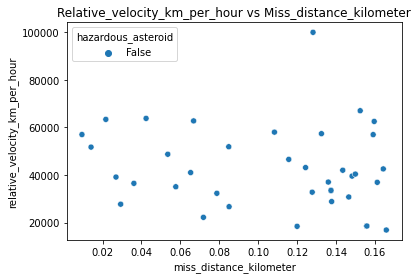

In [16]:
con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
# I converted my SQL queries to dataframe and then I made scatter plot
speed_size_hazardous_Earth_sql_queries = pd.read_sql_query('''SELECT asteroid_name,relative_velocity_km_per_hour,miss_distance_kilometer,hazardous_asteroid,estimated_diameter_max_km
FROM asteroid_details
INNER JOIN asteroid_speed
ON asteroid_details.neo_reference_id = asteroid_speed.neo_reference_id
INNER JOIN asteroid_size as asize
ON  asteroid_speed.neo_reference_id = asize.neo_reference_id
INNER JOIN hazardous_asteroid
on asize.neo_reference_id = hazardous_asteroid.neo_reference_id
ORDER by miss_distance_kilometer asc
LIMIT 50''',con)

# scatter plot 
sns.scatterplot(x = 'miss_distance_kilometer',
                y = 'relative_velocity_km_per_hour',
                data = speed_size_hazardous_Earth_sql_queries,
                hue = 'hazardous_asteroid')
plt.title('Relative_velocity_km_per_hour vs Miss_distance_kilometer')

plt.show()
con.close()

We can see that out of 50 asteroids that came closest to Earth, none of them was considered hazardous which is great news!

Question_4 : Find AVG(absolute_magnitude) for hazardous and non hazardous asteroids? Which group (hazardous or non-hazardous) has the highest absolute magnitude?

explaining the code: to get the answer to this question I need information from two tables AVG(absolute_magnitude) and hazardous_asteroid. I join two tables using neo_reference_id column that is present in both tables. I added ORDER BY DESC to show higher number first. then I used for loop to print each row from the SQL query result.

In [3]:
import psycopg2
import pandas as pd

con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
cur.execute('''SELECT hazardous_asteroid,AVG(absolute_magnitude) as AVG_magnitude 
               FROM hazardous_asteroid             
               INNER JOIN asteroid_size
               ON hazardous_asteroid.neo_reference_id = asteroid_size.neo_reference_id
               GROUP BY hazardous_asteroid
               ORDER BY AVG_magnitude desc;''')


for row in cur:
    print("hazardous asteroid: " + str(row[0]) +", AVG magnitude: "+str(row[1]))
cur.close()
con.close()

hazardous asteroid: False, AVG magnitude: 24.29014987912973
hazardous asteroid: True, AVG magnitude: 20.46383050847459


# Bar plot for question 4

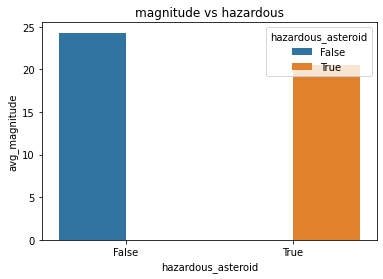

In [6]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
# I converted my SQL queries to dataframe and then I made scatter plot
magnitude_hazardousness_sql_queries = pd.read_sql_query('''SELECT hazardous_asteroid,AVG(absolute_magnitude) as AVG_magnitude 
               FROM hazardous_asteroid             
               INNER JOIN asteroid_size
               ON hazardous_asteroid.neo_reference_id = asteroid_size.neo_reference_id
               GROUP BY hazardous_asteroid
               ORDER BY AVG_magnitude desc;''',con)

# scatter plot 
sns.barplot(x = 'hazardous_asteroid',
                y = 'avg_magnitude',
                data = magnitude_hazardousness_sql_queries,
                hue = 'hazardous_asteroid')
plt.title('magnitude vs hazardous')

plt.show()


This plot shows that on average non-hazardous asteroids have higher magnitude as opposed to hazardous asteroids. 

question_5 : What are the fastest asteroid that came close to Earth after December 2021?

explaining the code: to get the answer to this question I need information from two tables asteroid_speed and asteroid_details. I used INNER JOIN to connect two tables using neo_reference_id column that is present in both tables. I added ORDER BY DESC clause against Max_velocity to show asteroids with higher velocities first. then I used for loop to print each row from the SQL query result.

In [19]:
import psycopg2

con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
cur.execute('''SELECT asteroid_name,close_approach_date, MAX(relative_velocity_km_per_hour) as Max_velocity
FROM asteroid_details as a
INNER JOIN asteroid_speed as s
ON s.neo_reference_id = a.neo_reference_id
Where close_approach_date >= '2021-12-01'
GROUP BY asteroid_name,close_approach_date
ORDER BY Max_velocity desc;''')
)
for row in cur:
    print("asteroid name : " + str(row[0]) + ", close_approach_date : " + str(row[1]) + " Max_velocity :  "  + str(row[2]))
cur.close()
con.close()

asteroid name : (2008 YA), close_approach_date : 2021-12-09 Max_velocity :  121987.9181784578
asteroid name : (2020 GM1), close_approach_date : 2021-12-29 Max_velocity :  120733.9845894403
asteroid name : 289227 (2004 XY60), close_approach_date : 2021-12-19 Max_velocity :  118508.8404429166
asteroid name : (2011 YL63), close_approach_date : 2021-12-08 Max_velocity :  114910.6886834278
asteroid name : (2015 XG261), close_approach_date : 2021-12-03 Max_velocity :  113668.9780749836
asteroid name : 477465 (2009 XZ1), close_approach_date : 2021-12-15 Max_velocity :  111642.3766222888
asteroid name : (2020 XK3), close_approach_date : 2021-12-02 Max_velocity :  108257.9400215525
asteroid name : (2017 WL15), close_approach_date : 2021-12-09 Max_velocity :  104735.212102944
asteroid name : (2020 XQ6), close_approach_date : 2021-12-21 Max_velocity :  103775.0198898467
asteroid name : 501878 (2014 WF365), close_approach_date : 2021-12-16 Max_velocity :  100531.9244257783
asteroid name : 170903 (

Question_6 : What are the names and close approach dates for 10 Hazardous asteroids that came closest to Earth?

explaining the code: to get the answer to this question I need information from two tables hazardous_asteroid and asteroid_details. I used CROSS JOIN to connect two tables. I added a filter using WHERE to limit the result to hazardous asteroids only and used ORDER BY DESC clause against close_approach_date to first show asteroids that have more recent Close Approach Date. Then I used for loop to print each row from the SQL query result.

In [10]:
con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
cur.execute('''SELECT asteroid_name, hazardous_asteroid,close_approach_date
FROM asteroid_details
CROSS JOIN hazardous_asteroid
where hazardous_asteroid = 'True'
ORDER BY close_approach_date desc
LIMIT 10;''')
)
for row in cur:
    print("asteroid name : " + str(row[0]) +",  hazardous_asteroid : "+ str(row[1]) + ", close_approach_date : " + str(row[2]))
cur.close()

asteroid name : (2003 SM84),  hazardous_asteroid : True, close_approach_date : 2021-12-31
asteroid name : (2003 SM84),  hazardous_asteroid : True, close_approach_date : 2021-12-31
asteroid name : (2003 SM84),  hazardous_asteroid : True, close_approach_date : 2021-12-31
asteroid name : (2003 SM84),  hazardous_asteroid : True, close_approach_date : 2021-12-31
asteroid name : (2003 SM84),  hazardous_asteroid : True, close_approach_date : 2021-12-31
asteroid name : (2003 SM84),  hazardous_asteroid : True, close_approach_date : 2021-12-31
asteroid name : (2003 SM84),  hazardous_asteroid : True, close_approach_date : 2021-12-31
asteroid name : (2003 SM84),  hazardous_asteroid : True, close_approach_date : 2021-12-31
asteroid name : (2003 SM84),  hazardous_asteroid : True, close_approach_date : 2021-12-31
asteroid name : (2003 SM84),  hazardous_asteroid : True, close_approach_date : 2021-12-31
